# Basic Prep and Models
This notebook is designed to show the shortest path from opening a file to getting a model, it will serve as a baseline for the 02 Notebook that goes into advanced data prep but then uses the same modelling code to consume the data.

The notebook was tested on Windows 10 with Python 3.7

## Imports
There are 3 classes of imports here some of these will need to be installed even with a std install of Conda

- `pip install missingno`
- `conda install pandas-profiling`
- `conda install altair`

In [1]:
# Core libs
import math as math
import numpy as np

# Data Processing/Prep
import pandas as pd
import missingno as msno
import pandas_profiling as pp

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

## Rectangulisation - Reading the file
This can be a very iterative experience, it is usually helpful to have some form of raw file reader like Notepad++ available to help determine the properties of the file, that combined with hit and miss gets the right properties to provide a rectangle. We need a rectangle because thats what most of the data manipulation tools need.

Verification of action is critical before moving on, in this case a simple `head` is what we are going to use.

"CSV is the worst form of transparent, tool agnostic file format, except for all the others"
Jenny Bryan

## Understanding the Data
After getting the file to load we perform a series of analysis on the data that tell us more about its shape, its types

In [2]:
titanic_df = pd.read_csv('Titanic_Dirty.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 3


In [3]:
titanic_df = pd.read_csv('Titanic_Dirty.csv', sep = '|', skiprows = 3, skipfooter = 1, engine = 'python')
titanic_df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
titanic_df.shape

(1310, 14)

In [5]:
titanic_df.tail(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
titanic_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [7]:
titanic_df.describe(include=['O'])

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


Now that we have looked at the data, and been confused by some of the names, we look up the meaning of the columns. We then give the columns more descriptive names so that we don't have to keep referring to  the docs or data dictionary.

In [9]:
titanic_df.columns = ['PassengerClass', 'Survived', 'Name', 'Sex', 'Age', 'NumofSiblingsSpouses','NumofParentsChildren', 'TicketNo','FarePrice','CabinNo','PortofEmbarcation','LifeboatNo','BodyIdNumber','HomeDestPair']


## EDA + Generating the "TODO" List
All the code we ran above to help understand the data(and more we could have run) seem very repetitive and take a while, there must be a better way and in fact there, Pandas Profiling brings back LOTS of information in one pass and helps to generate the "To Do" List.

In [10]:
pp.ProfileReport(titanic_df)
#profile = pp.ProfileReport(titanic_df)
#profile.to_file(outputfile="profile.html")

Number of variables,14
Number of observations,1310
Total Missing (%),21.1%
Total size in memory,143.4 KiB
Average record size in memory,112.1 B
Numeric,7
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,0


C:\dev\bin\Ana3_64\envs\scale\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\dev\bin\Ana3_64\envs\scale\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


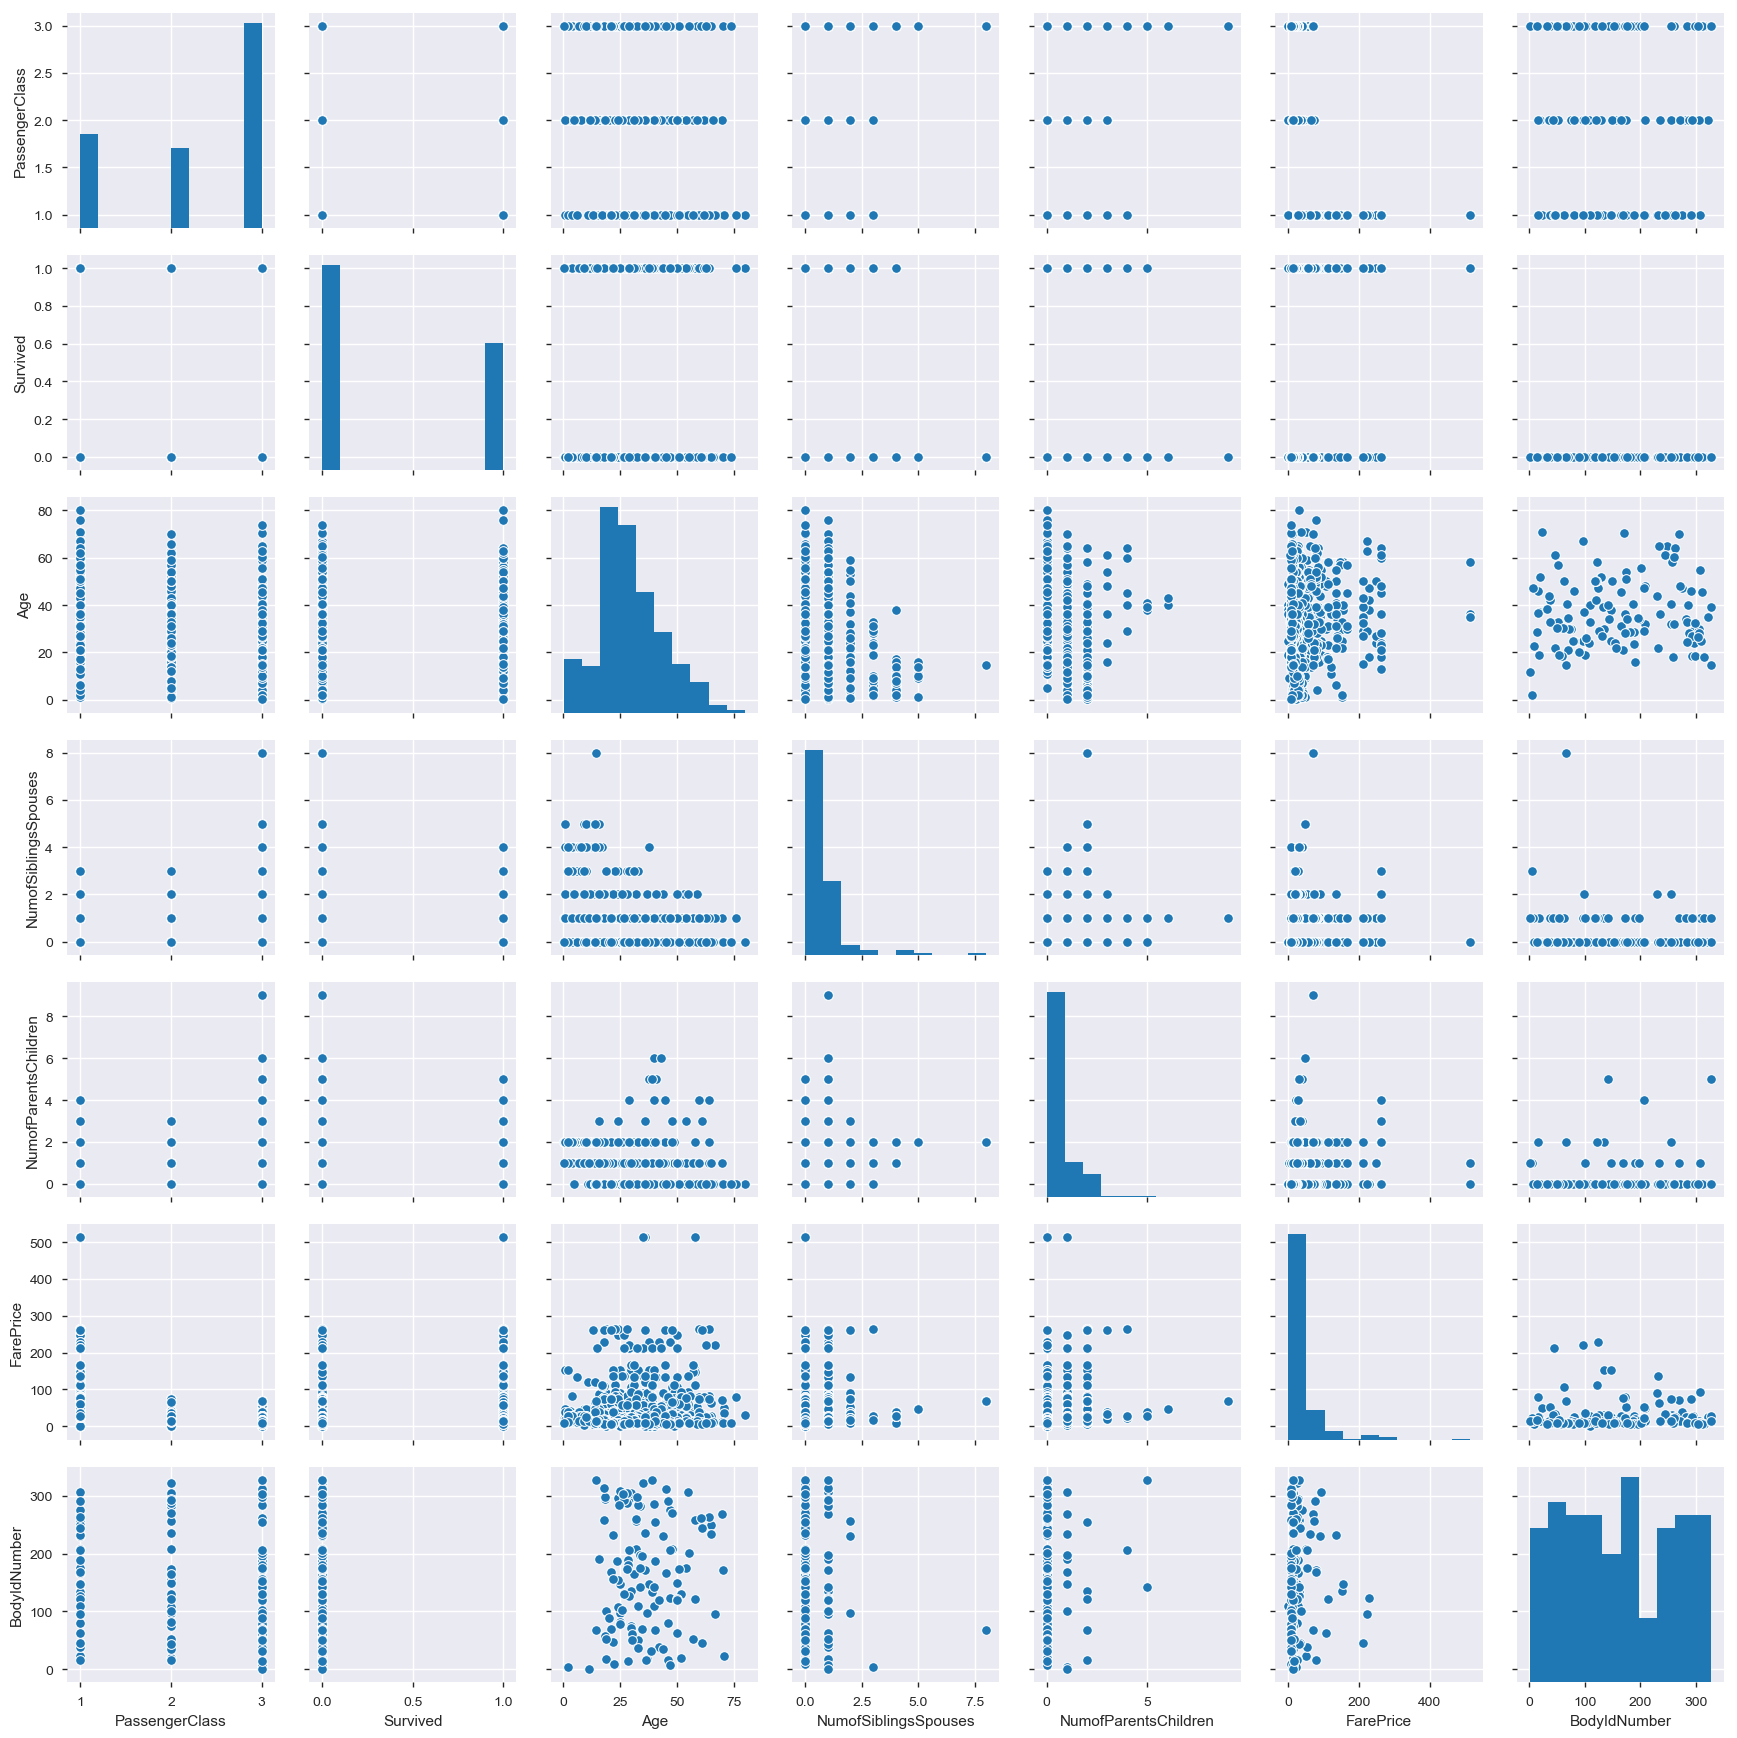

In [11]:
sns.pairplot(titanic_df)

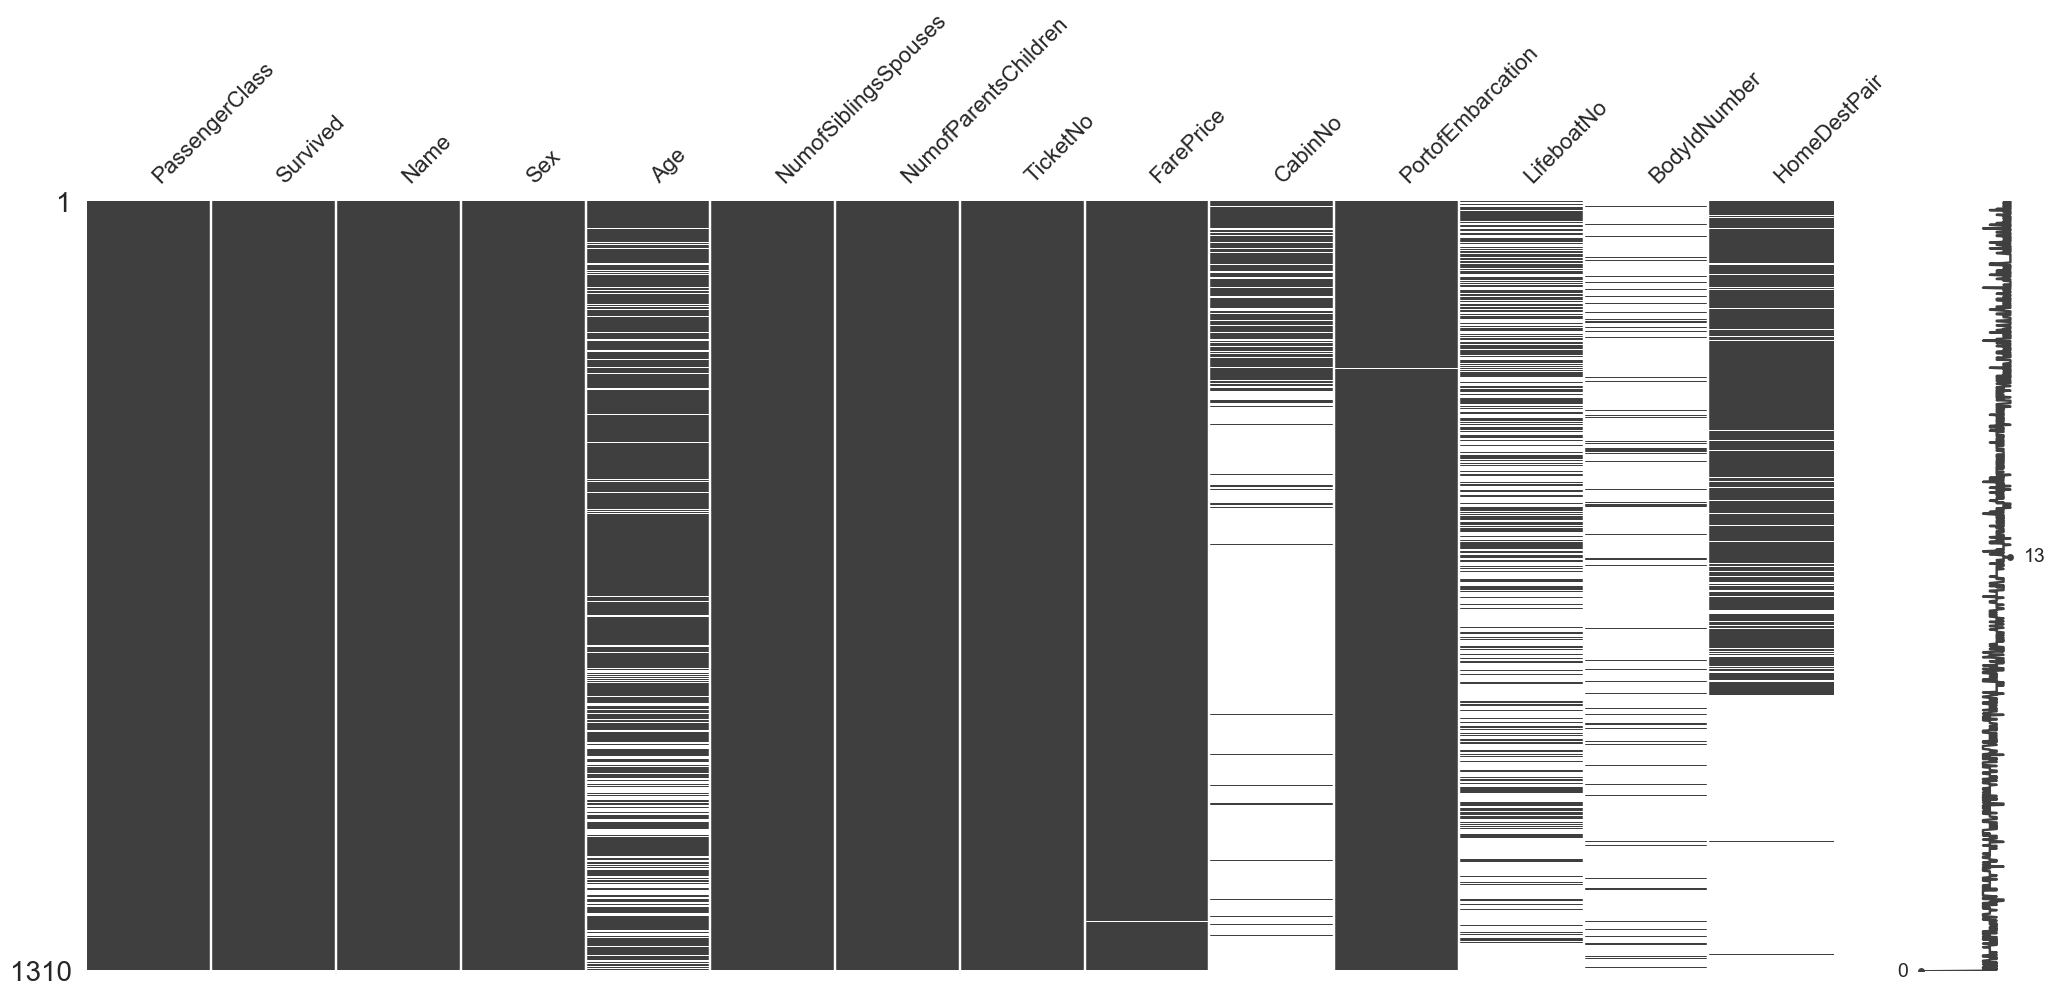

In [12]:
msno.matrix(titanic_df)


In [13]:
titanic_df.isnull().sum()

PassengerClass             1
Survived                   1
Name                       1
Sex                        1
Age                      264
NumofSiblingsSpouses       1
NumofParentsChildren       1
TicketNo                   1
FarePrice                  2
CabinNo                 1015
PortofEmbarcation          3
LifeboatNo               824
BodyIdNumber            1189
HomeDestPair             565
dtype: int64

## Type Consistency and Correctness

In [14]:
titanic_df['Survived'] = titanic_df['Survived'].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

Ooops that didn't work as planned!

The problem here is missing values, doing type coercion when there are values that can't be coerced (which is probably why they were inferred incorrectly in the first place) is not going to work. So we have to fix these, having looked at the data offline these are missing values (NaN) not Inf values so we will simply fill them in with sentinel/magic values for now, we may need to fix this later as this is generally not a good plan but it is quick.

In [15]:
titanic_df['Survived'] = titanic_df['Survived'].fillna(-1).astype(int)

In [16]:
titanic_df['FarePrice'] = titanic_df['FarePrice'].fillna(0).astype(int)

In [17]:
titanic_df['PassengerClass'] = titanic_df['PassengerClass'].fillna(2).astype(int)

Now lets verify that our changes worked

In [18]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
PassengerClass          1310 non-null int32
Survived                1310 non-null int32
Name                    1309 non-null object
Sex                     1309 non-null object
Age                     1046 non-null float64
NumofSiblingsSpouses    1309 non-null float64
NumofParentsChildren    1309 non-null float64
TicketNo                1309 non-null object
FarePrice               1310 non-null int32
CabinNo                 295 non-null object
PortofEmbarcation       1307 non-null object
LifeboatNo              486 non-null object
BodyIdNumber            121 non-null float64
HomeDestPair            745 non-null object
dtypes: float64(4), int32(3), object(7)
memory usage: 128.0+ KB


## Missing values
This is very common and in this dataset pretty problematic, as we can see from above with the missing matrix there is work to be done here. Lets do some more detailed digging using missingno again.

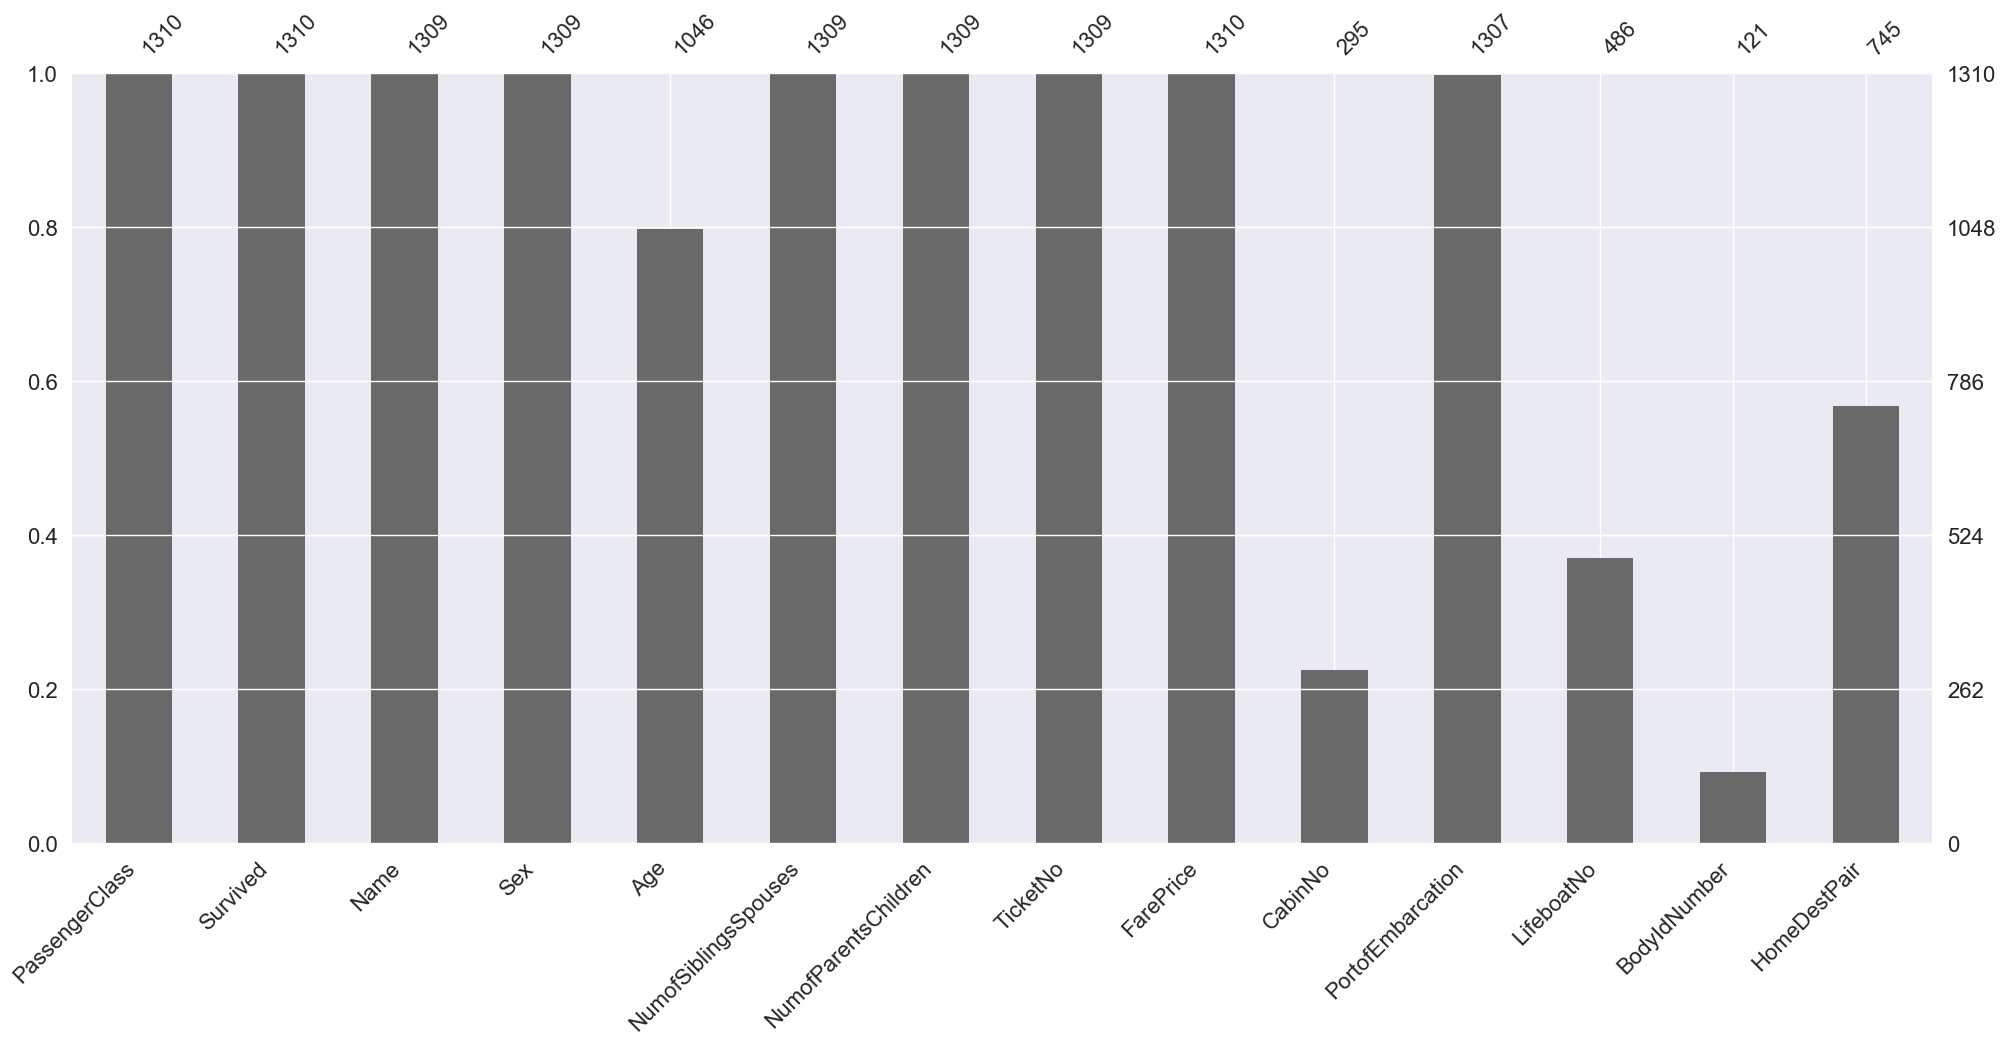

In [19]:
msno.bar(titanic_df)

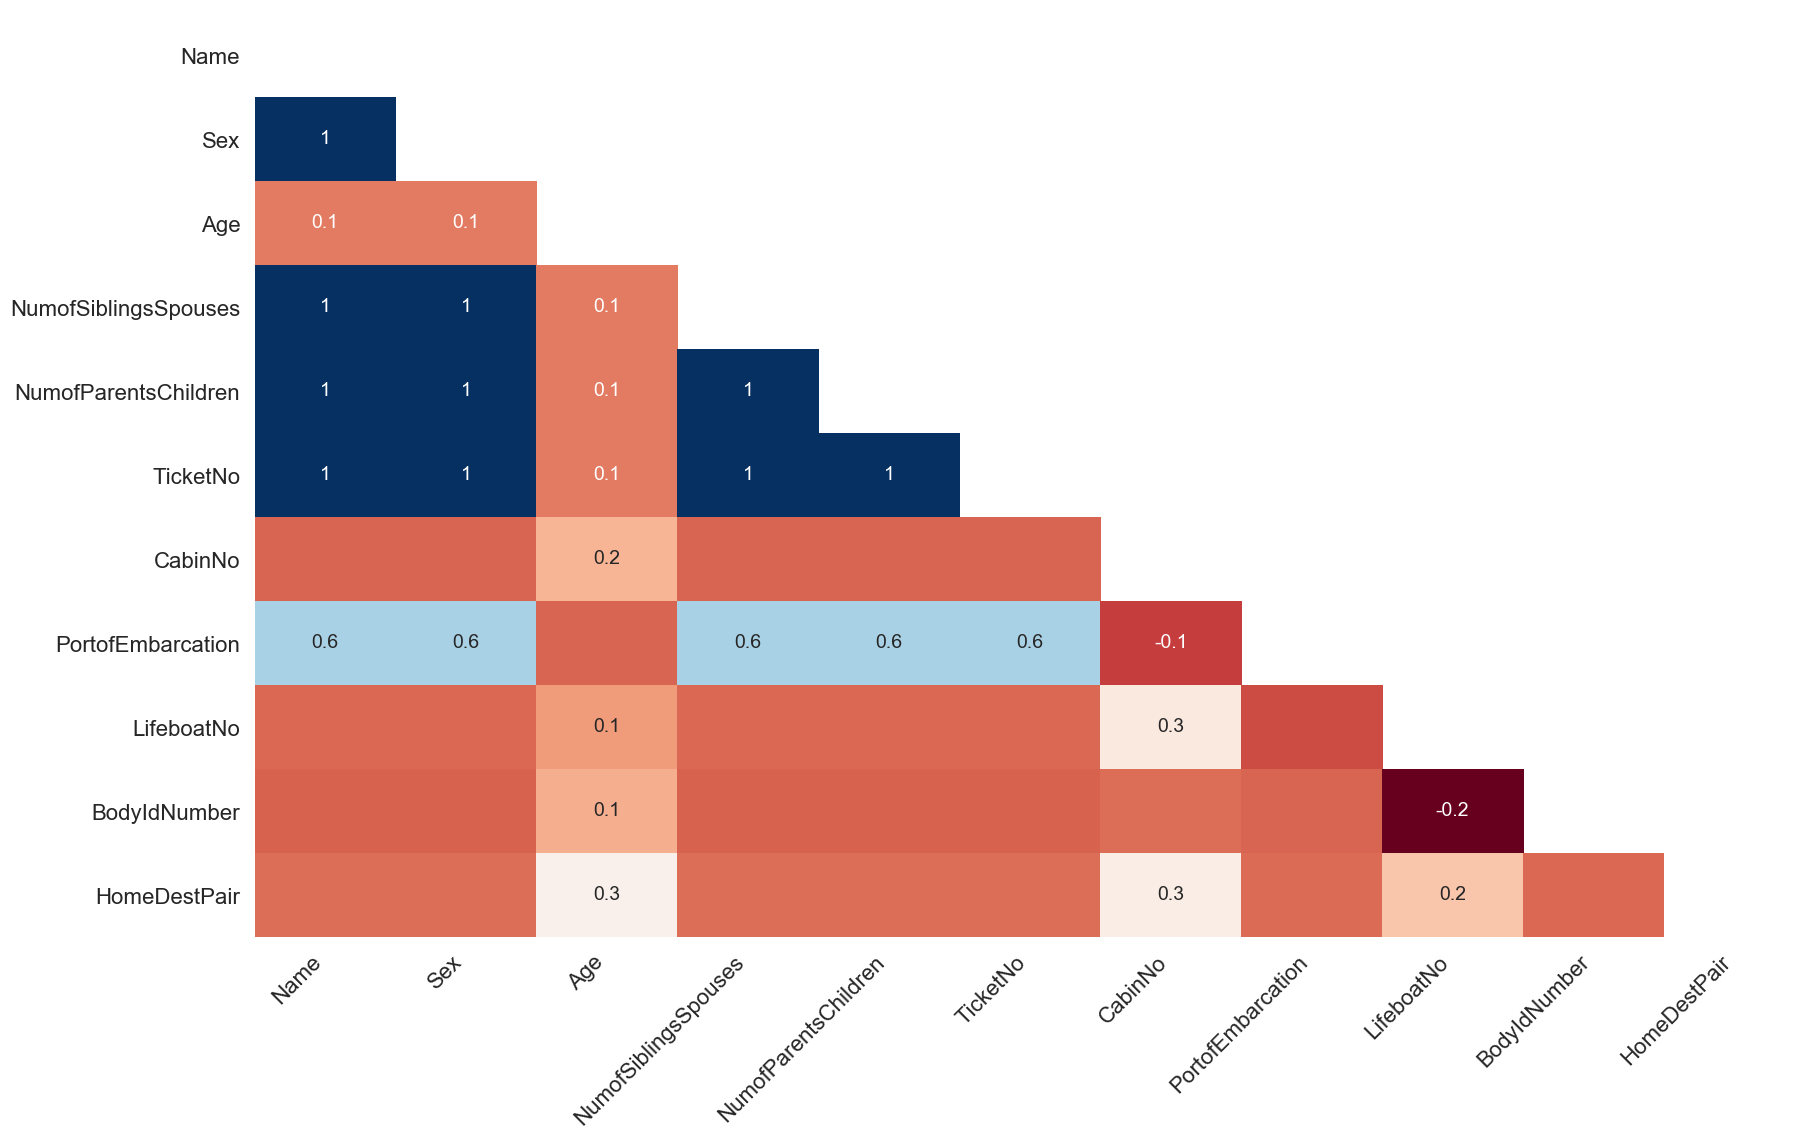

In [20]:
msno.heatmap(titanic_df)

In [21]:
titanic_df['LifeboatNo'].head(100)

0       2
1      11
2     NaN
3     NaN
4     NaN
5       3
6      10
7     NaN
8       D
9     NaN
10    NaN
11      4
12      9
13      6
14      B
15    NaN
16    NaN
17      6
18      8
19      A
20      5
21      5
22      5
23      4
24      8
25    NaN
26      7
27      7
28      8
29      D
     ... 
70    NaN
71    NaN
72      4
73     11
74    NaN
75    NaN
76     14
77    NaN
78     14
79      2
80    NaN
81    NaN
82      7
83      7
84    NaN
85      4
86    5 9
87      3
88      8
89    NaN
90      3
91      3
92      3
93     13
94      5
95      5
96    NaN
97      6
98      2
99      1
Name: LifeboatNo, Length: 100, dtype: object

The `LifeboatNo` field has a lot of missing but we need to look at what value is contained in the missing cells as we are going to do some verification later.

In this snext cell we are going to apply some business knowledge to verify the quality of the data, its fair to assume that if a passenger survived and yet has no lifeboat number then we have a big problem with the data and we would need to look deeper.

In [22]:
titanic_df_badrows = (titanic_df['Survived'] == 1) & (titanic_df['LifeboatNo'] == 'NaN' )
titanic_df_badrows.sum()

0

Luckily no problem with the data, this is a simple example there are lots more domain specific questions we could ask.

Next we are going to simply drop a bunch of columns that are low quality or that we don't think have a bearing on the model. Columns such as TicketNo that were identified by Pandas Profiling as having a high number of unique values.

If we had more time some of these columns would actually be worth exploring some more Cabin No for example is interesting as the number indicates the deck the passenger was one, but it may not relate to the location of the passenger when the iceberg was hit, which was just before midnight. Also this column has 77% missing values so is of questionable value even if its an interesting exercise.

In [23]:
titanic_df2 = titanic_df.copy()
titanic_df2 = titanic_df2.drop(['LifeboatNo', 'HomeDestPair', 'BodyIdNumber', 'TicketNo', 'PortofEmbarcation', 'CabinNo', 'NumofSiblingsSpouses','NumofParentsChildren'],axis=1)

Verify that we are reducing the number of columns missing data.

In [24]:
titanic_df2.isnull().sum()

PassengerClass      0
Survived            0
Name                1
Sex                 1
Age               264
FarePrice           0
dtype: int64

In our rough model Age looked like it might be an interesting feature so doing something more interesting here and filling in the missing values with the median.

However we are not sure if this is the right approach so making the changes in a forked version of the data frame to see if our hypothesis is confirmed

In [25]:
titanic_df_experiment = titanic_df2.copy()
titanic_df_experiment['Age'] = titanic_df_experiment['Age'].fillna(titanic_df_experiment['Age'].median())

In [26]:
titanic_df_experiment.isnull().sum()

PassengerClass    0
Survived          0
Name              1
Sex               1
Age               0
FarePrice         0
dtype: int64

Hmmm not sure if this was the right approach, lets look at the data a little, we have a hypothesis that the Age median could vary by one of the other factors, such as class (at least thats what was implied in the movie :-))

In [27]:
MedianAgeByClass = titanic_df2.groupby('PassengerClass')['Age'].median()
MedianAgeByClass

PassengerClass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [28]:
MedianAgeByClass = titanic_df_experiment.groupby('PassengerClass')['Age'].median()
MedianAgeByClass

PassengerClass
1    36.0
2    28.0
3    28.0
Name: Age, dtype: float64

Hmmmm interesting our change has moved the median on the age by what could be a significant amount, hardly surprising as by using median we are forcing a distribution across the entire data set. We should do some more analysis...

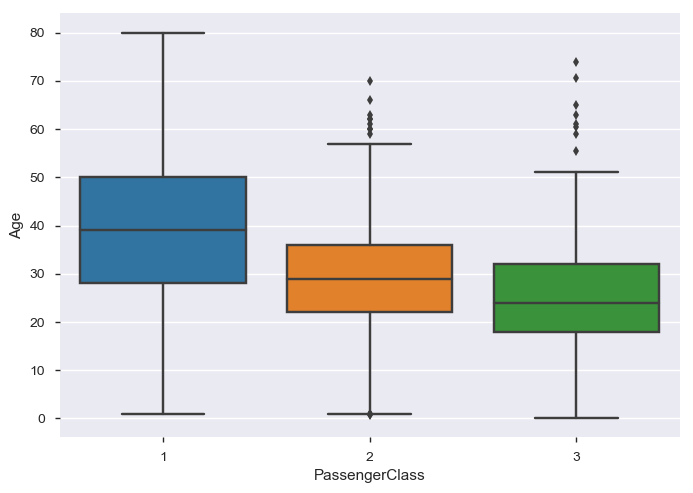

In [29]:
sns.boxplot(x = 'PassengerClass', y = 'Age', data = titanic_df2)

Boxplots are interesting but we sort of need to know how many values are in each box before deciding if our analysis is valid, so adding the N to the chart will help, its a lot of code for something so small though...

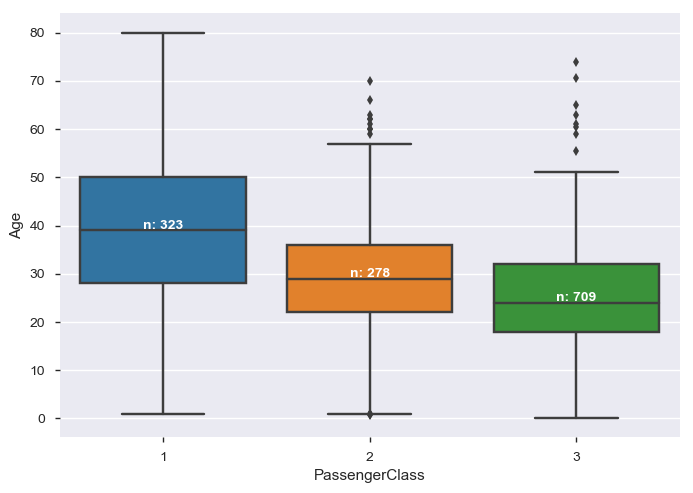

In [30]:
PlotAgeByClass = sns.boxplot(x = 'PassengerClass', y = 'Age', data = titanic_df2)

# Calculate number of obs per group & median to position labels
GroupedMedians = titanic_df2.groupby(['PassengerClass'])['Age'].median().values
ObsByGroup = titanic_df2.groupby('PassengerClass').size().values
ObsByGroup = [str(x) for x in ObsByGroup.tolist()]
ObsByGroup = ["n: " + i for i in ObsByGroup]
 
# Add it to the plot
pos = range(len(ObsByGroup))
for tick,label in zip(pos,PlotAgeByClass.get_xticklabels()):
    plt.text(pos[tick], GroupedMedians[tick] + 0.4, ObsByGroup[tick], horizontalalignment='center', size='medium', color='w', weight='semibold')


Violin plots are another way to know if we have a decent amount of data in each "box"

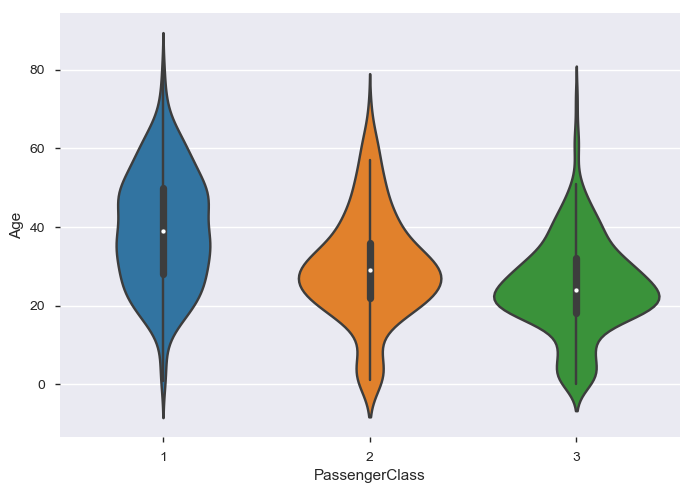

In [31]:
sns.violinplot( x='PassengerClass', y='Age', data=titanic_df2)

However this is my fave way of looking at this sort of data, overlay a strip plot with jitter over the top, pretty easy to understand now. 

plt.xkcd() is added just for fun.

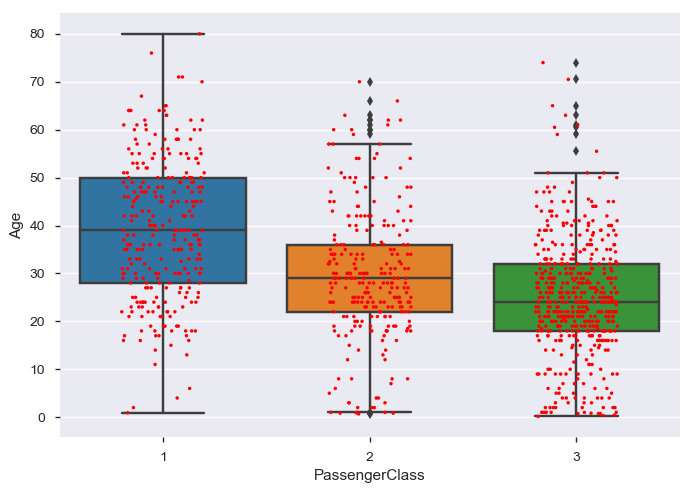

In [32]:
PlotAgeByClass = sns.boxplot(x = 'PassengerClass', y = 'Age', data = titanic_df2)
PlotAgeByClass = sns.stripplot(x='PassengerClass', y='Age', data=titanic_df2, color="red", jitter=0.2, size=2.5)

Phew after all that analysis time to act, we are simply going to use the group by to calc the median per Class and use that to fill in. This is a pretty simple solution in the interest of time, there are more options we could have provided, for example does port of embarkation have anything to do with the age?

In [33]:
titanic_df3 = titanic_df2.copy()
titanic_df3['Age'] = titanic_df3.groupby(['PassengerClass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [34]:
MedianAgeByClass = titanic_df3.groupby('PassengerClass')['Age'].median()
MedianAgeByClass

PassengerClass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [35]:
titanic_df3.isnull().sum()

PassengerClass    0
Survived          0
Name              1
Sex               1
Age               0
FarePrice         0
dtype: int64

Yipeee it worked, we have less missing data and we did not move the distribution of the classes while doing it, that may or may not have been the right approach...

We have 1 missing value in 2 columns, its the same row sojust taking a brute force approach and dropping the row, remember drop rows late... If we had made this call at the very beginning before dropping the columns and imputing the vast majority of the data would have been dropped because most rows had at least one missing value.

Also lets fix age to be an int, some algos don't like floats and while there are a small number of float values they are not going to move the model.

We have made a lot of changes to the dataset and if we screw something up its a lot of code to go back and rerun so taking a snapshot of the data at the start of the next phase by creating an explicit copy and also serialising.

In theory we could re-run the model code after each one of these phases to measure the impact of our changes more incrementally but in the interest of time for the session we are not going to.

In [36]:
titanic_df_nomissing = titanic_df3.copy()
titanic_df_nomissing = titanic_df_nomissing.dropna()
titanic_df_nomissing['Age'] = titanic_df_nomissing['Age'].astype(int)
titanic_df_nomissing.isnull().sum()

PassengerClass    0
Survived          0
Name              0
Sex               0
Age               0
FarePrice         0
dtype: int64

In [37]:
titanic_df_nomissing.head(10)

,PassengerClass,Survived,Name,Sex,Age,FarePrice
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,211
1,1,1,"Allison, Master. Hudson Trevor",male,0,151
2,1,0,"Allison, Miss. Helen Loraine",female,2,151
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,151
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,151
5,1,1,"Anderson, Mr. Harry",male,48,26
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,77
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,51
9,1,0,"Artagaveytia, Mr. Ramon",male,71,49


We have done our validationand feel good so lets write out the file as a new baseline.

In [38]:
titanic_df_nomissing.to_csv('titanic_nomissing.csv', index = False)

## Outliers

Now that we have less columns the pairplot is going to be easier to read, some blindingly obvious stuff pops out like the fact that passengers survived or not. We also see some interesting signs, like a potential outlier for `FairPrice` and also a very skewed distribution on `FairPrice`.

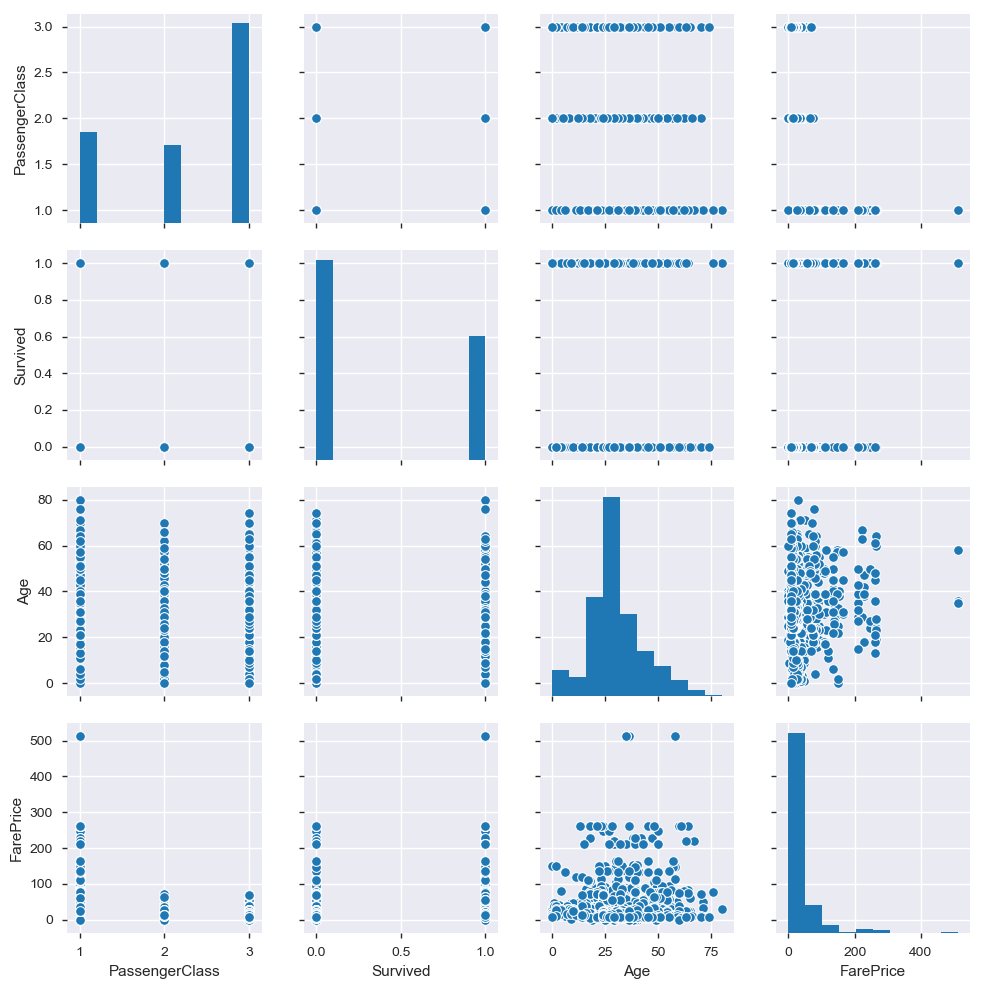

In [39]:
sns.pairplot(titanic_df_nomissing)

Lets drill into `FairPrice` a little and see if it does have outlier(s) we'll do this by using Seaborn's very cool distplot which is a histogram on steroids.

There are 2 religions in Data Science when it comes to Histograms, they are awesome and they suck royally. Most people don't have a middl eof the road opinion, most people that don't like them prefer Kernel Density Plots. Seaborn allows you to flip both Histogram and KDE modes.

As with all Historgrams the magic is in the bucket design, play around with that and see what difference it makes...

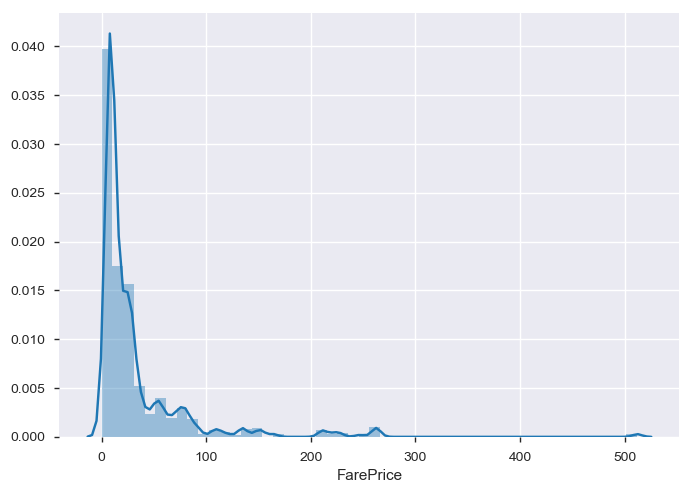

In [40]:
sns.distplot(titanic_df_nomissing['FarePrice'])
#kde=True/False hist=True/False rug=True/False

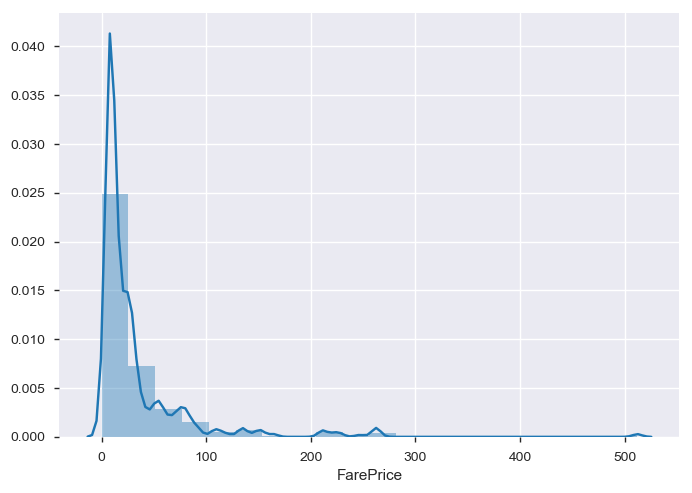

In [41]:
sns.distplot(titanic_df_nomissing['FarePrice'], bins = 20)

[Text(0.5, 0, '')]

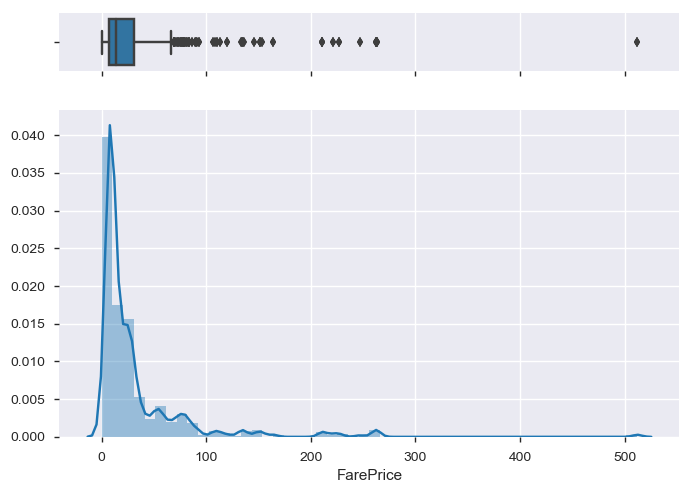

In [42]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(titanic_df_nomissing['FarePrice'], ax=ax_box)
sns.distplot(titanic_df_nomissing['FarePrice'], ax=ax_hist)
ax_box.set(xlabel='')

Facet'd plots are a greay way to look at different values n the same column in a discrete way but yet still be able to visually correlate

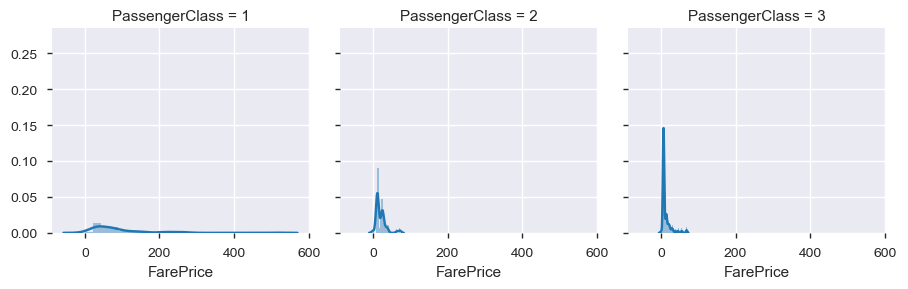

In [43]:
    grid = sns.FacetGrid(titanic_df_nomissing, col='PassengerClass')
    grid.map(sns.distplot, 'FarePrice')
    grid.add_legend();

As the first class is where we think there might be a problem lets fork it off to decide if we really have outliers.

There is no std way of determining outliers it is data dependent, there are some general guidelines, for example if the mean and median differ by more than 2-3 SD's that might indicate outliers, but it might not. Business knowledge comes in here as well, if there were an employee with a salary of one dollar and everyone else was in the 150k+ range would that be an outlier? What if it was the CEO? Could he be sending a message to the company/board? Could all his rewards be stock/bonus?

Vexxing indeed..


In [44]:
titanic_df_firstclass = titanic_df_nomissing[titanic_df_nomissing['PassengerClass'] == 1]
titanic_df_firstclass.head(10)

,PassengerClass,Survived,Name,Sex,Age,FarePrice
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,211
1,1,1,"Allison, Master. Hudson Trevor",male,0,151
2,1,0,"Allison, Miss. Helen Loraine",female,2,151
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,151
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,151
5,1,1,"Anderson, Mr. Harry",male,48,26
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,77
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,51
9,1,0,"Artagaveytia, Mr. Ramon",male,71,49


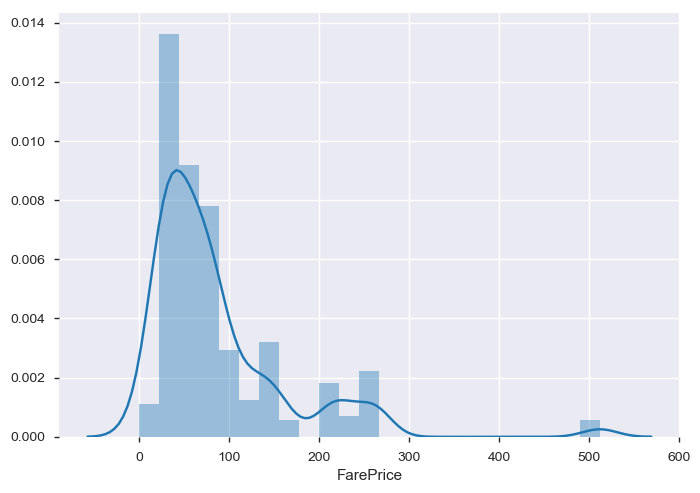

In [45]:
sns.distplot(titanic_df_firstclass['FarePrice'])

For the sake of time we are going to assume that this is ok and not an outlier, if it was an outlier we could choose several different approaches, such as scaling the data, winsorizing or simply removing the row, again its all data dependent.

## Feature Engineering

Up until now we have mostly been dealing with the data we have and its problems, feature engineering is not unique to data science but it is a lto more complicted and sophisticated. Creating a calculated member in BI is in a similar domain fo value to the consumer.

Fetaure engineering is really about creating new features from the data, these can be to make models more accurate or to work with certain classes of algorithm.


The title of the person provides an indication of their social standing in many ways so lets see if we can make a feature of that, we will split out the title and then bucket them.

In [46]:
Titles = {
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Aristocracy',
    'Don': 'Aristocracy',
    'Dona': 'Aristocracy',
    'Sir' : 'Aristocracy',
    'Dr': 'Professional',
    'Rev': 'Professional',
    'the Countess':'Aristocracy',
    'Mme': 'Mrs',
    'Mlle': 'Miss',
    'Ms': 'Mrs',
    'Mr' : 'Mr',
    'Mrs' : 'Mrs',
    'Miss' : 'Miss',
    'Master' : 'Master',
    'Lady' : 'Aristocracy'
}

titanic_df_nomissing['RawTitle'] = titanic_df_nomissing['Name'].map(lambda Name:Name.split(',')[1].split('.')[0].strip())
titanic_df_nomissing['Title'] = titanic_df_nomissing['RawTitle'].map(Titles)

In [47]:
titanic_df_nomissing['Title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Military', 'Professional',
       'Aristocracy'], dtype=object)

In [48]:
debug_df = titanic_df_nomissing[titanic_df_nomissing.isnull().any(axis=1)]
debug_df

,PassengerClass,Survived,Name,Sex,Age,FarePrice,RawTitle,Title


Verification time again, all the titles were extracted and grouped.

In [49]:
titanic_df_nomissing

,PassengerClass,Survived,Name,Sex,Age,FarePrice,RawTitle,Title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,211,Miss,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0,151,Master,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2,151,Miss,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,151,Mr,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,151,Mrs,Mrs
5,1,1,"Anderson, Mr. Harry",male,48,26,Mr,Mr
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,77,Miss,Miss
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,Mr,Mr
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,51,Mrs,Mrs
9,1,0,"Artagaveytia, Mr. Ramon",male,71,49,Mr,Mr


### Encoding Features
Now that we know all the titles have been handled we need to make it a field that can be consumed, a valid feature. Some algo's, especially classification ones, are unable to handle categorical/string based features. So we have to turn them into integers. One approach is simply to map the strings to numbers, its not actually required to force the number here but the control is good for consistency.

In [50]:
titanic_df_experiment = titanic_df_nomissing.copy()
TitleGroups = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Military': 5, 'Professional': 6, 'Aristocracy': 7}

titanic_df_experiment['TitleIndex'] = titanic_df_experiment['Title'].map(TitleGroups)

In [51]:
titanic_df_experiment

,PassengerClass,Survived,Name,Sex,Age,FarePrice,RawTitle,Title,TitleIndex
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,211,Miss,Miss,2
1,1,1,"Allison, Master. Hudson Trevor",male,0,151,Master,Master,4
2,1,0,"Allison, Miss. Helen Loraine",female,2,151,Miss,Miss,2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,151,Mr,Mr,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,151,Mrs,Mrs,3
5,1,1,"Anderson, Mr. Harry",male,48,26,Mr,Mr,1
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,77,Miss,Miss,2
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,Mr,Mr,1
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,51,Mrs,Mrs,3
9,1,0,"Artagaveytia, Mr. Ramon",male,71,49,Mr,Mr,1


Ok our brute force approach worked but its not ideal. In some algo's there will be a relative weighting applied because the numbers monotonically increase i.e. Mr will be less valuable than Miss because they are 1 and 2 respectively.

To solve this we are going to use a Dummy Variable/One Hot Encoding approach, we could have used several others. This will create a column for each unique value in the column and then for each row assign a binary value of 0 or 1 to indicate its value.

Sklearn has a bunch of preprocessors for all of these encoding options, pandas just provides a handy shortcut. This approach will not work in all cases and it bloats the column count, finding the right solution here can involve a lot of experimentation.

In [52]:
titanic_df_features = titanic_df_nomissing.copy()
DummyTitleGroups = pd.get_dummies(titanic_df_features['Title'], prefix='Title')
titanic_df_features = pd.concat([titanic_df_features, DummyTitleGroups], axis=1)
titanic_df_features.head(10)

,PassengerClass,Survived,Name,Sex,Age,FarePrice,RawTitle,Title,Title_Aristocracy,Title_Master,Title_Military,Title_Miss,Title_Mr,Title_Mrs,Title_Professional
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,211,Miss,Miss,0,0,0,1,0,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0,151,Master,Master,0,1,0,0,0,0,0
2,1,0,"Allison, Miss. Helen Loraine",female,2,151,Miss,Miss,0,0,0,1,0,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,151,Mr,Mr,0,0,0,0,1,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,151,Mrs,Mrs,0,0,0,0,0,1,0
5,1,1,"Anderson, Mr. Harry",male,48,26,Mr,Mr,0,0,0,0,1,0,0
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,77,Miss,Miss,0,0,0,1,0,0,0
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,Mr,Mr,0,0,0,0,1,0,0
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,51,Mrs,Mrs,0,0,0,0,0,1,0
9,1,0,"Artagaveytia, Mr. Ramon",male,71,49,Mr,Mr,0,0,0,0,1,0,0


Ok lets assume we like our approach and have validated, make sure we drop the features that are replaced by the dummy variable columns.

Then we will do the same for the sex feature.

In [53]:
titanic_df_features = titanic_df_features.drop(['RawTitle','Title','Name'], axis=1)
titanic_df_features.head(10)

,PassengerClass,Survived,Sex,Age,FarePrice,Title_Aristocracy,Title_Master,Title_Military,Title_Miss,Title_Mr,Title_Mrs,Title_Professional
0,1,1,female,29,211,0,0,0,1,0,0,0
1,1,1,male,0,151,0,1,0,0,0,0,0
2,1,0,female,2,151,0,0,0,1,0,0,0
3,1,0,male,30,151,0,0,0,0,1,0,0
4,1,0,female,25,151,0,0,0,0,0,1,0
5,1,1,male,48,26,0,0,0,0,1,0,0
6,1,1,female,63,77,0,0,0,1,0,0,0
7,1,0,male,39,0,0,0,0,0,1,0,0
8,1,1,female,53,51,0,0,0,0,0,1,0
9,1,0,male,71,49,0,0,0,0,1,0,0


In [54]:
DummySex = pd.get_dummies(titanic_df_features['Sex'], prefix='Sex')
titanic_df_features = pd.concat([titanic_df_features, DummySex], axis=1)
titanic_df_features.head(10)

,PassengerClass,Survived,Sex,Age,FarePrice,Title_Aristocracy,Title_Master,Title_Military,Title_Miss,Title_Mr,Title_Mrs,Title_Professional,Sex_female,Sex_male
0,1,1,female,29,211,0,0,0,1,0,0,0,1,0
1,1,1,male,0,151,0,1,0,0,0,0,0,0,1
2,1,0,female,2,151,0,0,0,1,0,0,0,1,0
3,1,0,male,30,151,0,0,0,0,1,0,0,0,1
4,1,0,female,25,151,0,0,0,0,0,1,0,1,0
5,1,1,male,48,26,0,0,0,0,1,0,0,0,1
6,1,1,female,63,77,0,0,0,1,0,0,0,1,0
7,1,0,male,39,0,0,0,0,0,1,0,0,0,1
8,1,1,female,53,51,0,0,0,0,0,1,0,1,0
9,1,0,male,71,49,0,0,0,0,1,0,0,0,1


In [55]:
titanic_df_features = titanic_df_features.drop(['Sex'], axis=1)
titanic_df_features.head(10)

,PassengerClass,Survived,Age,FarePrice,Title_Aristocracy,Title_Master,Title_Military,Title_Miss,Title_Mr,Title_Mrs,Title_Professional,Sex_female,Sex_male
0,1,1,29,211,0,0,0,1,0,0,0,1,0
1,1,1,0,151,0,1,0,0,0,0,0,0,1
2,1,0,2,151,0,0,0,1,0,0,0,1,0
3,1,0,30,151,0,0,0,0,1,0,0,0,1
4,1,0,25,151,0,0,0,0,0,1,0,1,0
5,1,1,48,26,0,0,0,0,1,0,0,0,1
6,1,1,63,77,0,0,0,1,0,0,0,1,0
7,1,0,39,0,0,0,0,0,1,0,0,0,1
8,1,1,53,51,0,0,0,0,0,1,0,1,0
9,1,0,71,49,0,0,0,0,1,0,0,0,1


For the purposes of this exercise we are finished, many many many more hours could be spent on all these before we even get to the modelling aspects, check out Kaggle's Titanic Kernels to see some amazing use of stats and ML models to get accuracies at 100% for the models.

It is possible that the data prep and model development are being done by different people one different schedules so a good idea to write out the data for the next consuming process. In this case we are using CSV for ease and because the know the data is small but if it was bigger than a more efficient format like Parquet would be better.

In [56]:
titanic_df_features.to_csv('titanic_features.csv', index = False)